C:\Users\丁驥\AppData\Local\Temp\ipykernel_6336\4208271541.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\丁驥\AppData\Local\Temp\ipykernel_6336\4208271541.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


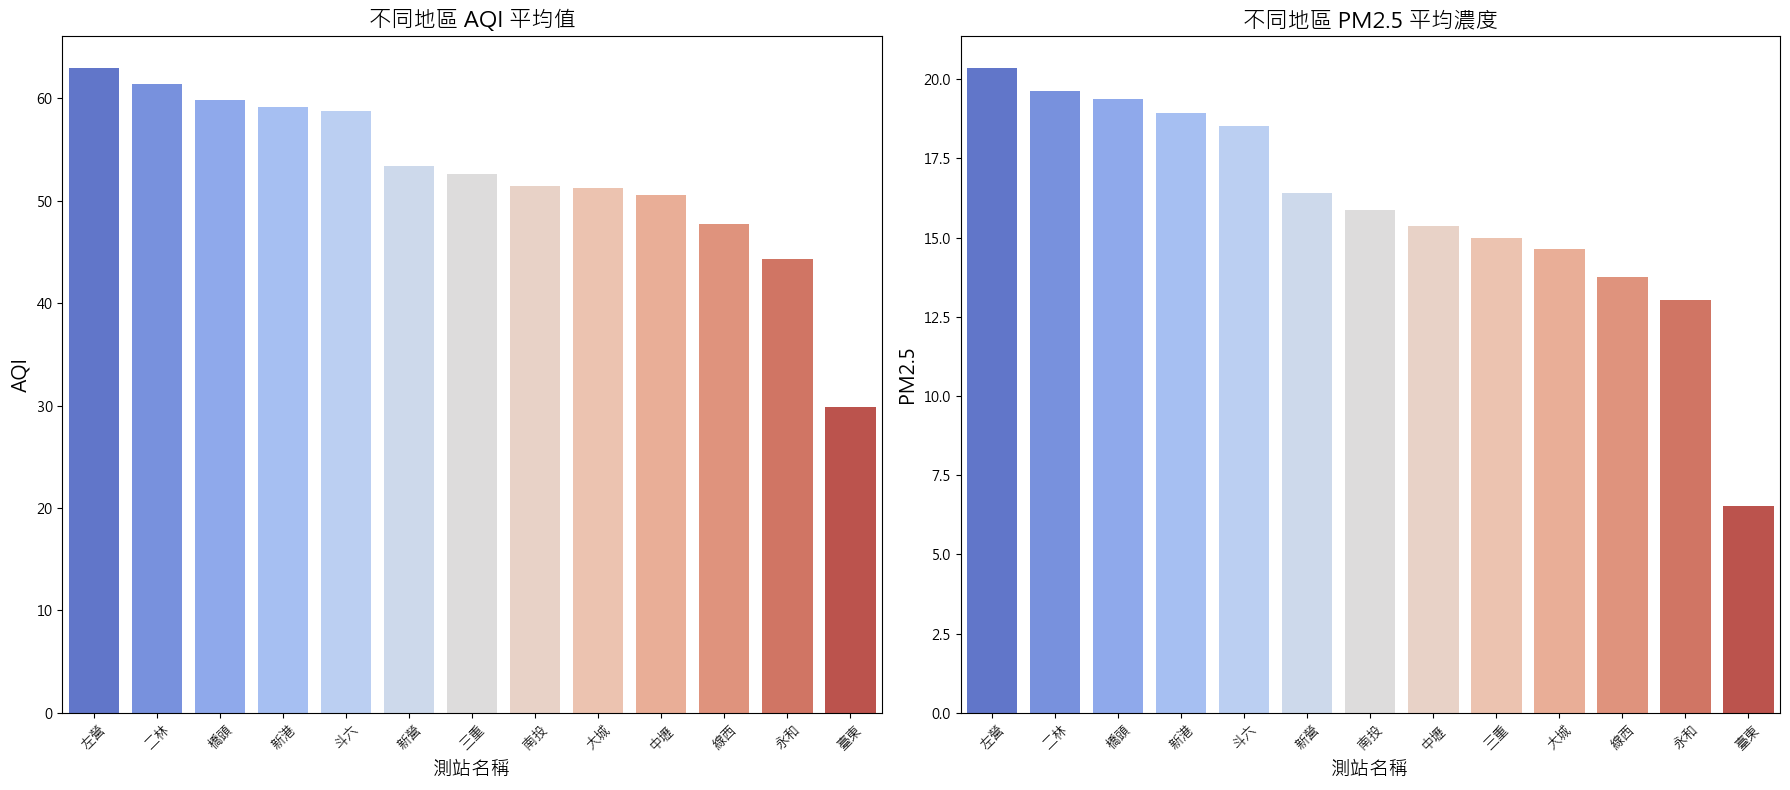

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取清理後的資料
file_path = '../2023_09_2024_08_AQI_Weather_dataset.csv'  
data = pd.read_csv(file_path)

# 區域分佈分析：比較不同地區的 AQI 和 PM2.5 平均值
area_analysis = data.groupby('sitename')[['aqi', 'pm2.5']].mean()

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 繁體字型
plt.rcParams['axes.unicode_minus'] = False  # 避免顯示負號錯誤

# 建立並排的子圖
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 繪製 AQI 條形圖
sns.barplot(
    x=area_analysis.sort_values('aqi', ascending=False).index,
    y=area_analysis.sort_values('aqi', ascending=False)['aqi'],
    palette='coolwarm', ax=axes[0]
)
axes[0].set_title("不同地區 AQI 平均值", fontsize=16)
axes[0].set_ylabel("AQI", fontsize=14)
axes[0].set_xlabel("測站名稱", fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# 繪製 PM2.5 條形圖
sns.barplot(
    x=area_analysis.sort_values('pm2.5', ascending=False).index,
    y=area_analysis.sort_values('pm2.5', ascending=False)['pm2.5'],
    palette='coolwarm', ax=axes[1]
)
axes[1].set_title("不同地區 PM2.5 平均濃度", fontsize=16)
axes[1].set_ylabel("PM2.5", fontsize=14)
axes[1].set_xlabel("測站名稱", fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

# 自動調整子圖佈局
plt.tight_layout()
plt.show()


C:\Users\丁驥\AppData\Local\Temp\ipykernel_6336\1323494776.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_analysis.index, y=area_analysis['aqi'], palette='coolwarm')


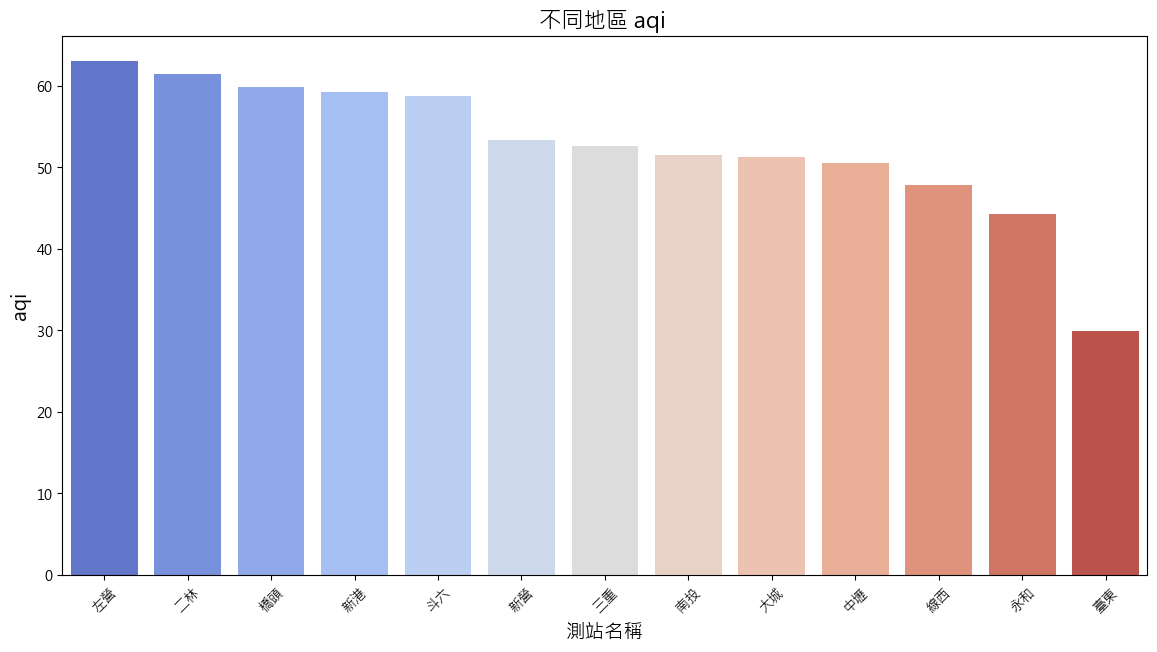

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import geopandas as gpd
from shapely.geometry import Point


# 區域分佈分析：比較不同地區的 AQI 和 PM2.5 平均值
area_analysis = data.groupby('sitename')[['aqi', 'pm2.5']].mean().sort_values(by='aqi', ascending=False)


plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 繁體字型
plt.rcParams['axes.unicode_minus'] = False  # 避免顯示負號錯誤

# 繪製 PM2.5 平均濃度的條形圖
plt.figure(figsize=(14, 7))
sns.barplot(x=area_analysis.index, y=area_analysis['aqi'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("不同地區 aqi ", fontsize=16)
plt.ylabel("aqi", fontsize=14)
plt.xlabel("測站名稱", fontsize=14)
plt.show()




In [12]:
data.shape

(114192, 22)

In [13]:
data.columns

Index(['datacreationdate', 'sitename', 'aqi', 'so2', 'co', 'o3', 'o3_8hr',
       'pm10', 'pm2.5', 'no2', 'nox', 'no', 'co_8hr', 'pm2.5_avg', 'pm10_avg',
       'so2_avg', '測站氣壓(hPa)', '氣溫(℃)', '相對溼度(%)', '風速(m/s)', '風向(360degree)',
       '降水量(mm)'],
      dtype='object')

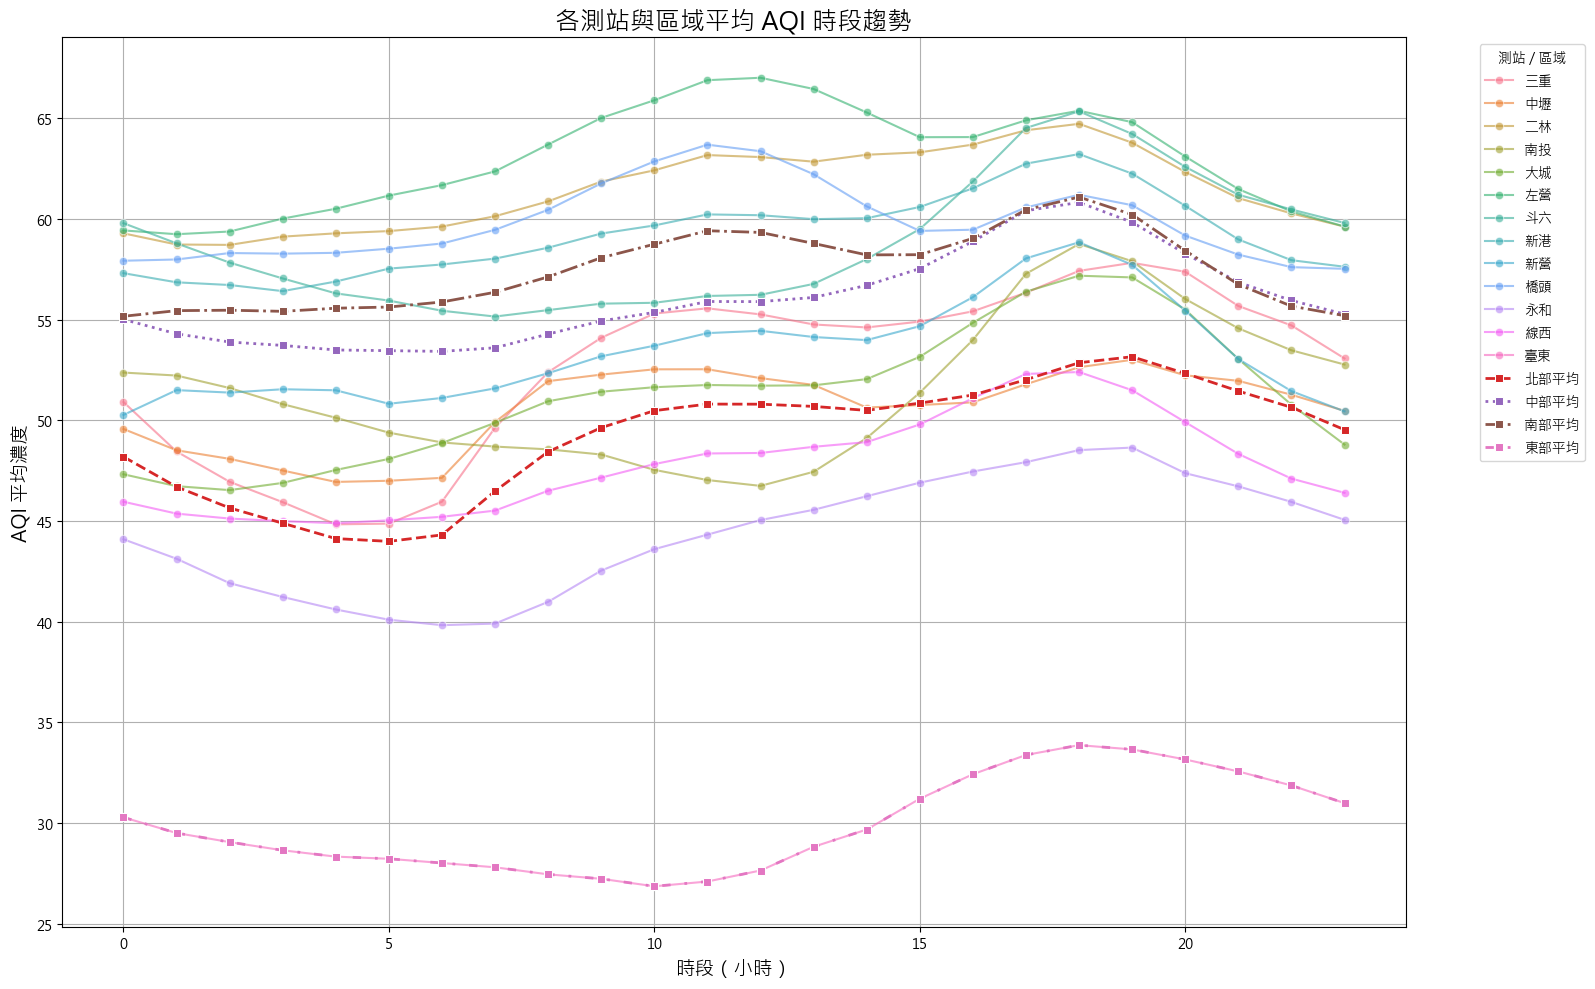

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 確保 'datacreationdate' 為 datetime 格式
data['datacreationdate'] = pd.to_datetime(data['datacreationdate'])
data['hour'] = data['datacreationdate'].dt.hour  # 提取時段（小時）

# 手動分區域對應測站
regions = {
    '北部': ['三重', '永和', '中壢'],
    '中部': ['二林', '線西', '斗六'],
    '南部': ['橋頭', '新營', '新港'],
    '東部': ['臺東']
}

# 添加 'region' 欄位
def assign_region(sitename):
    for region, stations in regions.items():
        if sitename in stations:
            return region
    return '其他'

data['region'] = data['sitename'].apply(assign_region)

# 計算每個測站的時段 AQI 平均值
hourly_trends = data.groupby(['sitename', 'hour'])['aqi'].mean().reset_index()

# 計算每個區域的時段 AQI 平均值
hourly_region_avg = data.groupby(['region', 'hour'])['aqi'].mean().reset_index()

# 繪圖
plt.figure(figsize=(16, 10))

# 個別測站 AQI 趨勢圖
sns.lineplot(data=hourly_trends, x='hour', y='aqi', hue='sitename', alpha=0.6, marker='o')

# 區域平均 AQI 趨勢圖（使用虛線）
region_styles = {
    '北部': 'dashed',
    '中部': 'dotted',
    '南部': 'dashdot',
    '東部': (0, (3, 5, 1, 5)) 
}

for region in region_styles.keys():
    sns.lineplot(
        data=hourly_region_avg[hourly_region_avg['region'] == region],
        x='hour', y='aqi', label=f'{region}平均', 
        linestyle=region_styles[region], linewidth=2, marker='s'
    )

# 圖表標題與標籤
plt.title("各測站與區域平均 AQI 時段趨勢", fontsize=18)
plt.xlabel("時段（小時）", fontsize=14)
plt.ylabel("AQI 平均濃度", fontsize=14)

# 圖例設置
plt.legend(title="測站 / 區域", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()


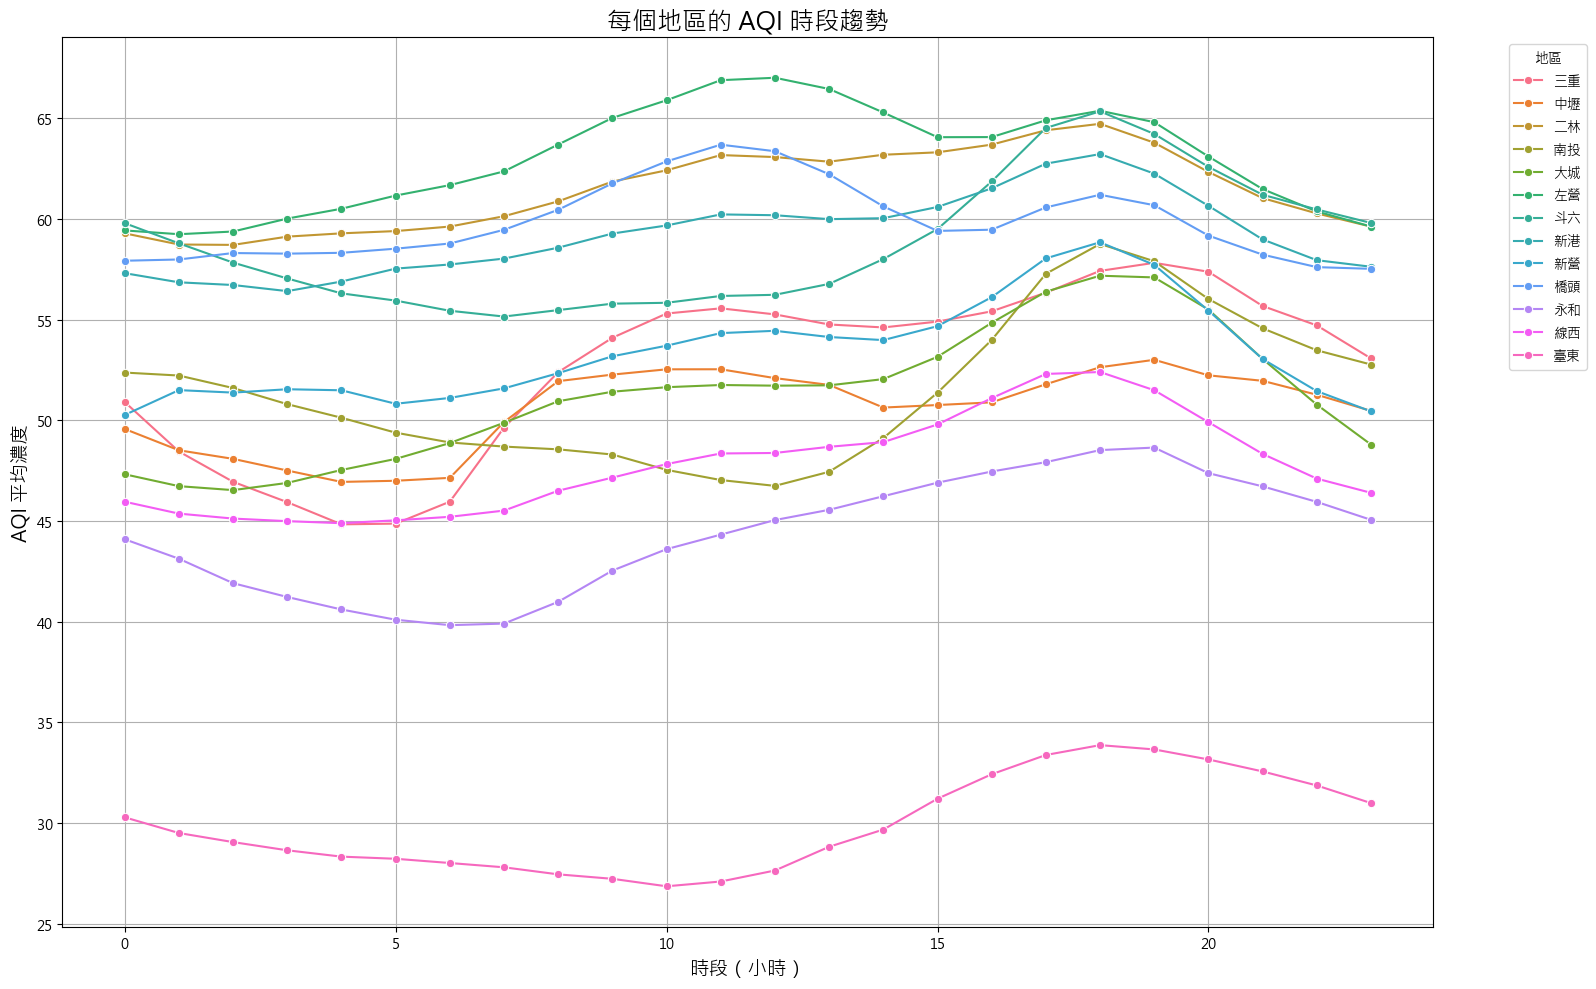

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 時間欄位需確保為 datetime 格式
data['datacreationdate'] = pd.to_datetime(data['datacreationdate'])
data['hour'] = data['datacreationdate'].dt.hour  # 提取時段（小時）

# 計算每個地區在不同時段的 AQI 平均濃度
hourly_trends = data.groupby(['sitename', 'hour'])['aqi'].mean().reset_index()

# 繪製每個地區在不同時段的 AQI 趨勢圖
plt.figure(figsize=(16, 10))
sns.lineplot(data=hourly_trends, x='hour', y='aqi', hue='sitename', marker='o')
plt.title("每個地區的 AQI 時段趨勢", fontsize=18)
plt.xlabel("時段（小時）", fontsize=14)
plt.ylabel("AQI 平均濃度", fontsize=14)
plt.legend(title="地區", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()


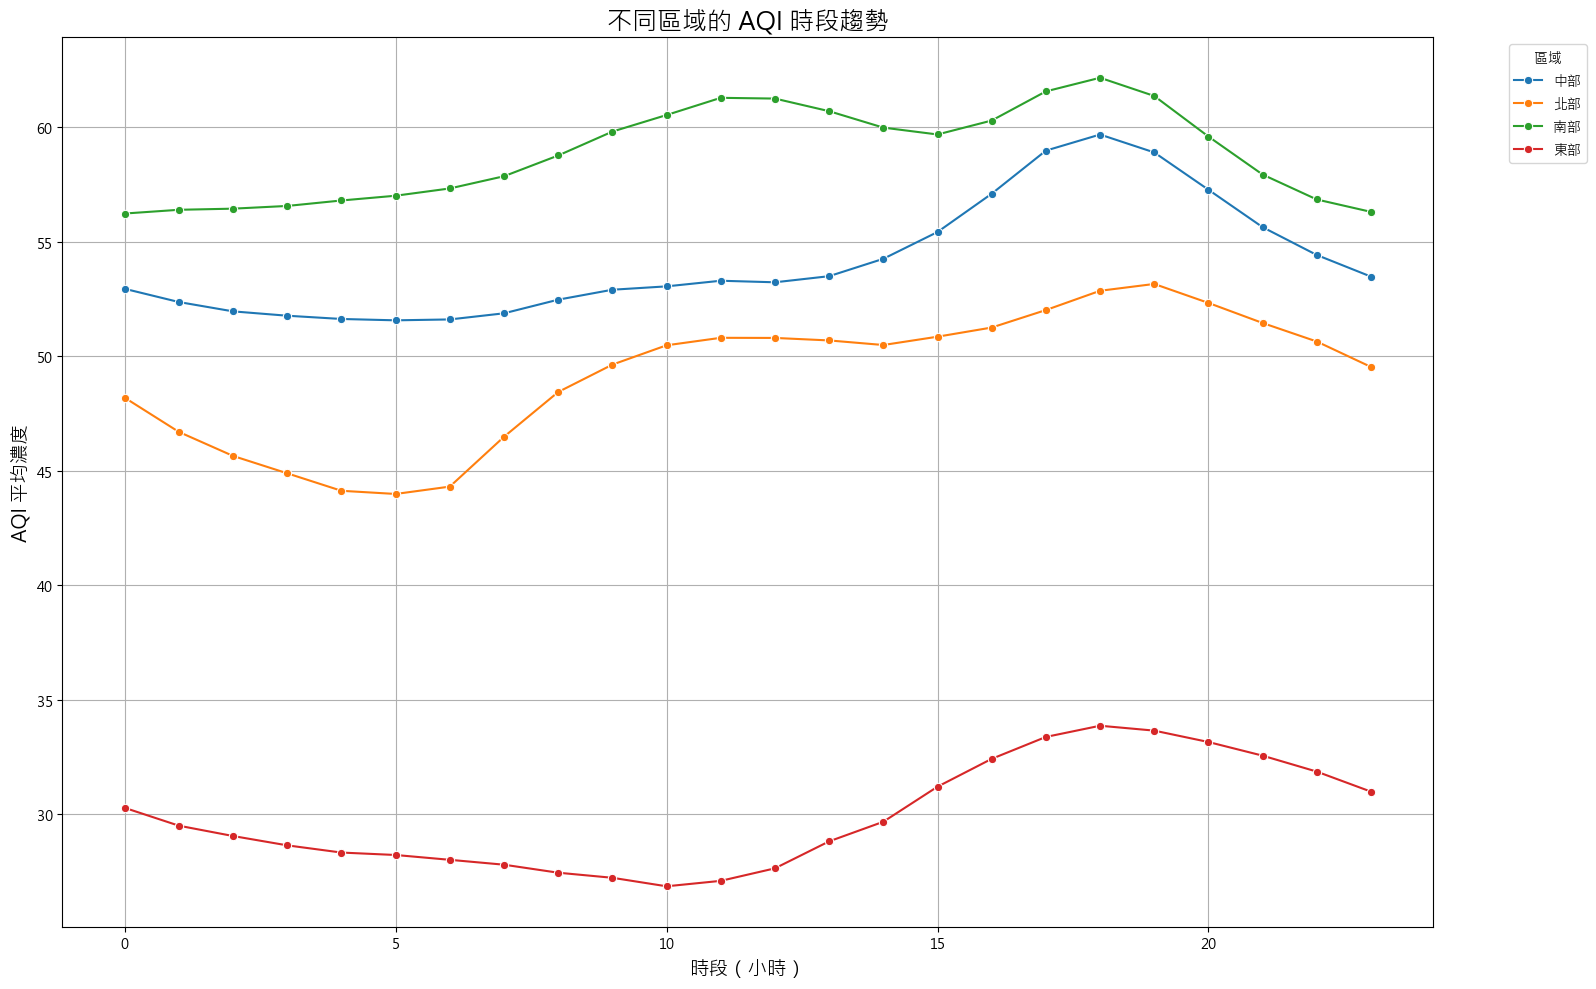

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



data['datacreationdate'] = pd.to_datetime(data['datacreationdate'])
data['hour'] = data['datacreationdate'].dt.hour  # 提取時段（小時）

# 手動分區域對應測站（需根據實際數據調整）
regions = {
    '北部': ['三重', '永和', '中壢'],  
    '中部': ['二林', '線西', '斗六','南投','大城'],  
    '南部': ['橋頭', '新營', '新港','左營'],  
    '東部': ['臺東']  
}

# 添加 'region' 欄位
def assign_region(sitename):
    for region, stations in regions.items():
        if sitename in stations:
            return region
    
    print(sitename)
    return '其他'


data['region'] = data['sitename'].apply(assign_region)

# 計算每個時段的 AQI 平均濃度，按區域分組
hourly_region_avg = data.groupby(['region', 'hour'])['aqi'].mean().reset_index()

# 繪製每個區域在不同時段的 AQI 趨勢圖
plt.figure(figsize=(16, 10))
sns.lineplot(data=hourly_region_avg, x='hour', y='aqi', hue='region', marker='o')
plt.title("不同區域的 AQI 時段趨勢", fontsize=18)
plt.xlabel("時段（小時）", fontsize=14)
plt.ylabel("AQI 平均濃度", fontsize=14)
plt.legend(title="區域", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()


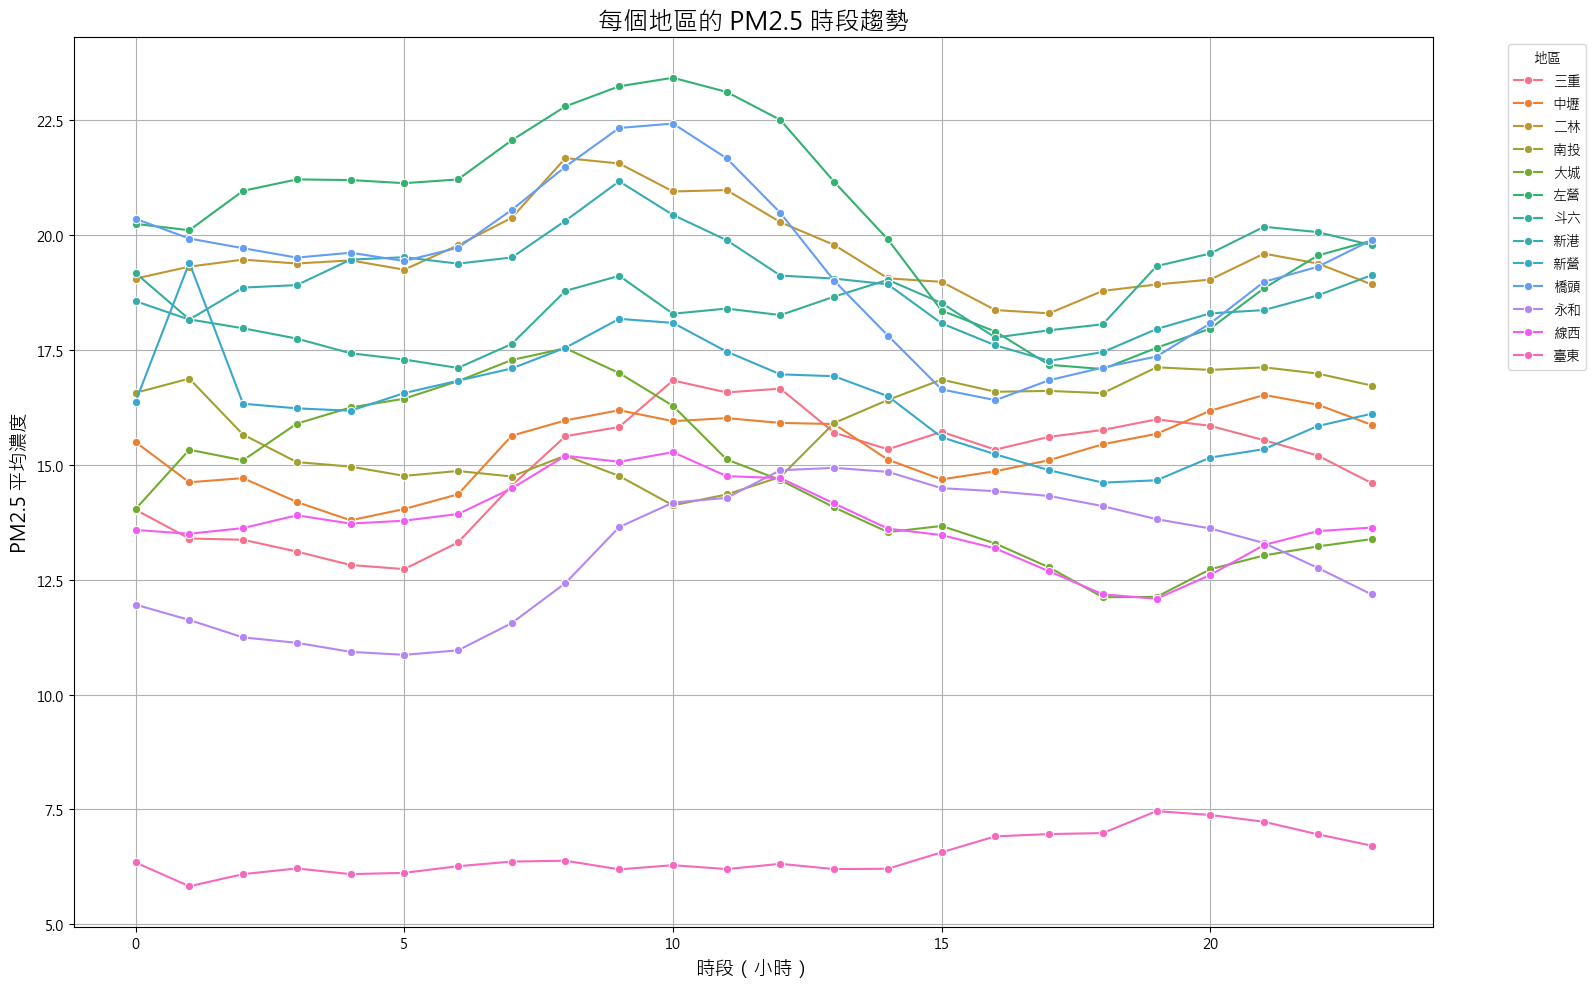

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 時間欄位需確保為 datetime 格式
data['datacreationdate'] = pd.to_datetime(data['datacreationdate'])
data['hour'] = data['datacreationdate'].dt.hour  # 提取時段（小時）

# 計算每個地區在不同時段的 PM2.5 平均濃度
hourly_trends = data.groupby(['sitename', 'hour'])['pm2.5'].mean().reset_index()

# 繪製每個地區在不同時段的 PM2.5 趨勢圖
plt.figure(figsize=(16, 10))
sns.lineplot(data=hourly_trends, x='hour', y='pm2.5', hue='sitename', marker='o')
plt.title("每個地區的 PM2.5 時段趨勢", fontsize=18)
plt.xlabel("時段（小時）", fontsize=14)
plt.ylabel("PM2.5 平均濃度", fontsize=14)
plt.legend(title="地區", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()


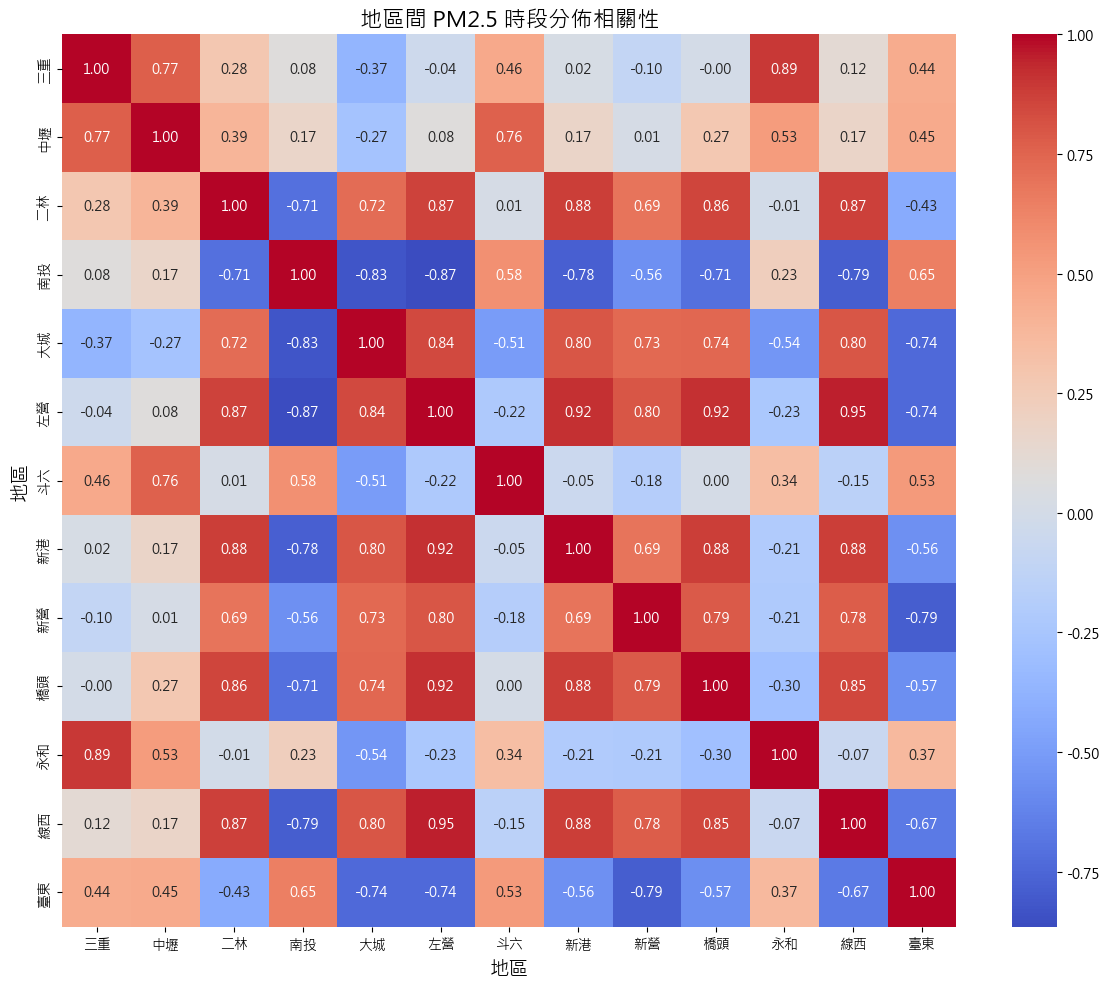

In [ ]:
# 時間欄位需確保為 datetime 格式
data['datacreationdate'] = pd.to_datetime(data['datacreationdate'])
data['hour'] = data['datacreationdate'].dt.hour  # 提取小時

# 計算每地區在不同時段的 PM2.5 平均值
hourly_trends = data.groupby(['sitename', 'hour'])['pm2.5'].mean().unstack(level=0)

# 計算地區間的相關性
correlation_matrix = hourly_trends.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("地區間 PM2.5 時段分佈相關性", fontsize=16)
plt.xlabel("地區", fontsize=14)
plt.ylabel("地區", fontsize=14)
plt.tight_layout()
plt.show()





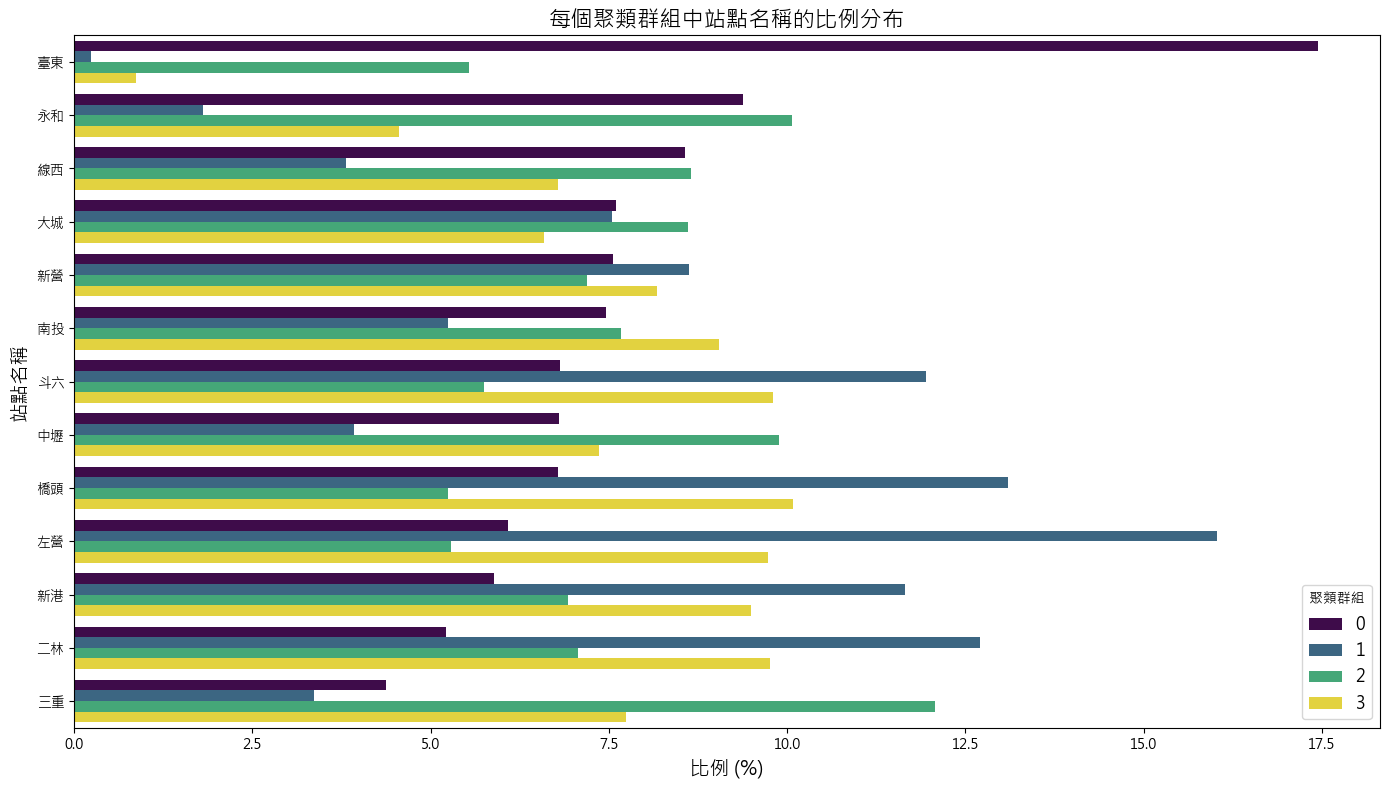

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

features = ['aqi']
clustering_data = data[features].dropna()

# 使用 KMeans 
kmeans = KMeans(n_clusters=4, random_state=42)
clustering_data['cluster'] = kmeans.fit_predict(clustering_data[features])

# 將 'sitename' 連同聚類結果一起展示
clustering_data['sitename'] = data.loc[clustering_data.index, 'sitename']

# 計算每個群組中各站點名稱的數量和比例
cluster_site_counts = clustering_data.groupby('cluster')['sitename'].value_counts(normalize=True).rename('proportion').reset_index()

# 將比例轉換為百分比顯示格式
cluster_site_counts['proportion'] *= 100

# 繪製每個聚類群組中站點比例條形圖
plt.figure(figsize=(14, 8))
sns.barplot(x='proportion', y='sitename', hue='cluster', data=cluster_site_counts, palette='viridis')
plt.title("每個聚類群組中站點名稱的比例分布", fontsize=16)
plt.xlabel("比例 (%)", fontsize=14)
plt.ylabel("站點名稱", fontsize=14)
plt.legend(title="聚類群組", fontsize=12)
plt.tight_layout()
plt.show()


In [20]:
data.columns

Index(['datacreationdate', 'sitename', 'aqi', 'so2', 'co', 'o3', 'o3_8hr',
       'pm10', 'pm2.5', 'no2', 'nox', 'no', 'co_8hr', 'pm2.5_avg', 'pm10_avg',
       'so2_avg', '測站氣壓(hPa)', '氣溫(℃)', '相對溼度(%)', '風速(m/s)', '風向(360degree)',
       '降水量(mm)', 'hour', 'region'],
      dtype='object')